In [1]:
# import the required modules
# make sure that dsb_data_dir = os.path.join('E:\ML_Basics_using_Python_Workshop_7th_sem\Cartisan_internship', 'nuclei_datasets')
# results in the directory which contains the stage1_train and stage1_test folders.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dsb_data_dir = os.path.join('E:\ML_Basics_using_Python_Workshop_7th_sem\Cartisan_internship', 'nuclei_datasets')
# stage_label = 'stage1'

In [2]:
print(dsb_data_dir)


E:\ML_Basics_using_Python_Workshop_7th_sem\Cartisan_internship\nuclei_datasets


In [2]:
# data preprocessing 
# all_images contains train images(approx. 236/670 due to datarate supported by jupyter notebook, with their respective masks) 
# and test images(65/65)
# masks of each train image is combined through this approach.
# Dataframes consisting of image details are created.



all_images = glob(os.path.join(dsb_data_dir, 'stage1_*', '*', '*', '*'))[:11000]
print(type(all_images))
print(all_images)
img_df = pd.DataFrame({'path': all_images})
img_id = lambda in_path: in_path.split('\\')[-3]
img_type = lambda in_path: in_path.split('\\')[-2]
img_group = lambda in_path: in_path.split('\\')[-4].split('_')[1]
img_stage = lambda in_path: in_path.split('\\')[-4].split('_')[0]
img_df['ImageId'] = img_df['path'].map(img_id)
img_df['ImageType'] = img_df['path'].map(img_type)
img_df['TrainingSplit'] = img_df['path'].map(img_group)
img_df['Stage'] = img_df['path'].map(img_stage)
img_df.sample(2)  # selects samples randomly.

<class 'list'>
['E:\\ML_Basics_using_Python_Workshop_7th_sem\\Cartisan_internship\\nuclei_datasets\\stage1_test\\0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5\\images\\0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5.png', 'E:\\ML_Basics_using_Python_Workshop_7th_sem\\Cartisan_internship\\nuclei_datasets\\stage1_test\\0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac\\images\\0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac.png', 'E:\\ML_Basics_using_Python_Workshop_7th_sem\\Cartisan_internship\\nuclei_datasets\\stage1_test\\0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732\\images\\0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732.png', 'E:\\ML_Basics_using_Python_Workshop_7th_sem\\Cartisan_internship\\nuclei_datasets\\stage1_test\\0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925\\images\\0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925.png', 'E:\\ML_Basics_u

path  \
7314  E:\ML_Basics_using_Python_Workshop_7th_sem\Car...   
9597  E:\ML_Basics_using_Python_Workshop_7th_sem\Car...   

                                                ImageId ImageType  \
7314  3b0709483b1e86449cc355bb797e841117ba178c6ae1ed...     masks   
9597  4dbbb275960ab9e4ec2c66c8d3000f7c70c8dce5112df5...     masks   

     TrainingSplit   Stage  
7314         train  stage1  
9597         train  stage1

In [6]:
# Take only the training images and represent images as RGB matrix and masks as binary matrix(0s and 1s)

train_df = img_df.query('TrainingSplit=="train"') # contains only train images dataframe.
train_rows = []
group_cols = ['Stage', 'ImageId']
for n_group, n_rows in train_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['masks'] = n_rows.query('ImageType == "masks"')['path'].values.tolist()
    c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()
    train_rows += [c_row] # list of dictionaries, where each dictionary contains stage, imageid and list of all the masks of that particular
                            # imageid.
        
print(train_rows)
train_img_df = pd.DataFrame(train_rows)[:-1] # last row has empty list hence excluded.
IMG_CHANNELS = 3
def read_and_stack(in_img_list):
    return np.sum(np.stack([imread(c_img) for c_img in in_img_list], 0), 0)/255.0

print(type(train_img_df['images']))
print(train_img_df['images'].sample(1))
train_img_df['images'] = train_img_df['images'].map(read_and_stack).map(lambda x: x[:,:,:IMG_CHANNELS]) #reading the images in RGB format

train_img_df['masks'] = train_img_df['masks'].map(read_and_stack).map(lambda x: x.astype(int)) # reading masks and storing them as interger values(bcoz binary)
train_img_df.sample(1)


[{'Stage': 'stage1', 'ImageId': '00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552', 'masks': ['E:\\ML_Basics_using_Python_Workshop_7th_sem\\Cartisan_internship\\nuclei_datasets\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png', 'E:\\ML_Basics_using_Python_Workshop_7th_sem\\Cartisan_internship\\nuclei_datasets\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png', 'E:\\ML_Basics_using_Python_Workshop_7th_sem\\Cartisan_internship\\nuclei_datasets\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5cac5d08023c328d7f05.png', 'E:\\ML_Basics_using_Python_Workshop_7th_sem\\Cartisan_internship\\nuclei_datasets\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\

<class 'pandas.core.series.Series'>
37    [E:\ML_Basics_using_Python_Workshop_7th_sem\Ca...
Name: images, dtype: object


ImageId   Stage  \
96  2246874c8b5ba218d01ad8153a201ad4660195f3e4c65d...  stage1   

                                               images  \
96  [[[0.4, 0.18823529411764706, 0.741176470588235...   

                                                masks  
96  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

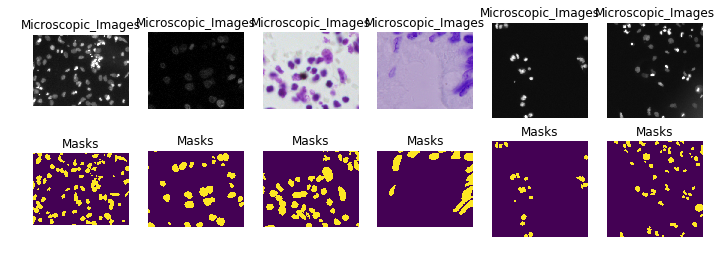

In [8]:
# show some of the images and masks.

n_img = 6
fig, m_axs = plt.subplots(2, n_img, figsize = (12, 4))
for (_, c_row), (c_im, c_lab) in zip(train_img_df.sample(n_img).iterrows(), 
                                     m_axs.T):
    c_im.imshow(c_row['images'])
    c_im.axis('off')
    c_im.set_title('Microscopic_Images')
    
    c_lab.imshow(c_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Masks')

In [9]:
train_img_df['images'].map(lambda x: x.shape).value_counts() # gives the number of training images with their respective shapes.  

(256, 256, 3)      109
(256, 320, 3)       43
(520, 696, 3)       34
(360, 360, 3)       31
(1024, 1024, 3)      9
(512, 640, 3)        5
(260, 347, 3)        2
(603, 1272, 3)       2
Name: images, dtype: int64

In [10]:
# develop a simple CNN for semantic segmentation(nucleus segmentation). 

from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, UpSampling2D, Lambda
simple_cnn = Sequential()
simple_cnn.add(BatchNormalization(input_shape = (None, None, IMG_CHANNELS), 
                                  name = 'NormalizeInput'))
simple_cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
simple_cnn.add(Conv2D(8, kernel_size = (3,3), padding = 'same'))
# use dilations to get a slightly larger field of view
simple_cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
simple_cnn.add(Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
simple_cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 3, padding = 'same'))

# the final processing
simple_cnn.add(Conv2D(16, kernel_size = (1,1), padding = 'same'))
simple_cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
simple_cnn.summary()

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 8)     224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 16)    528       
__________

In [12]:
from keras import backend as K
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
simple_cnn.compile(optimizer = 'adam', 
                   loss = dice_coef_loss, 
                   metrics = [dice_coef, 'acc', 'mse'])

In [13]:
def simple_gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

simple_cnn.fit_generator(simple_gen(), 
                         steps_per_epoch=10, # train_img_df.shape[0],
                        epochs = 2)  # just for demonstration purpose. 

# actual parameters value: steps_per_epoch = 100, epochs = 25 which gave an accuracy of approx. 93 %


Epoch 1/2
10/10 [==============================] - 13s 1s/step - loss: -0.3121 - dice_coef: 0.3121 - acc: 0.6950 - mean_squared_error: 0.2479
Epoch 2/2
10/10 [==============================] - 9s 930ms/step - loss: -0.6211 - dice_coef: 0.6211 - acc: 0.9194 - mean_squared_error: 0.0708


In [14]:
test_df = img_df.query('TrainingSplit=="test"')
test_rows = []
group_cols = ['Stage', 'ImageId']
for n_group, n_rows in test_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()
    test_rows += [c_row]
    
test_img_df = pd.DataFrame(test_rows)    

print(test_img_df)
test_img_df['images'] = test_img_df['images'].map(read_and_stack).map(lambda x: x[:,:,:IMG_CHANNELS])
print(test_img_df.shape[0], 'images to process')
test_img_df.sample(1)
test_img_df['images'].sample(1)


                                              ImageId   Stage  \
0   0114f484a16c152baa2d82fdd43740880a762c93f436c8...  stage1   
1   0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...  stage1   
2   0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed3...  stage1   
3   0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd4...  stage1   
4   0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa...  stage1   
5   0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c0...  stage1   
6   1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1...  stage1   
7   17b9bf4356db24967c4677b8376ac38f826de73a88b93a...  stage1   
8   1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c...  stage1   
9   191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107...  stage1   
10  1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e...  stage1   
11  1cdbfee1951356e7b0a215073828695fe1ead5f8b1add1...  stage1   
12  1d9eacb3161f1e2b45550389ecf7c535c7199c6b44b1c6...  stage1   
13  1ef68e93964c2d9230100c1347c328f6385a7bc027879d...  stage1   
14  259b35151d4a7a5ffdd7a

40    [[[0.047058823529411764, 0.047058823529411764,...
Name: images, dtype: object

In [17]:
print(test_img_df['images'].sample(1).shape)

test_img_df['masks'] = test_img_df['images'].map(lambda x: simple_cnn.predict(np.expand_dims(x, 0))[0, :, :, 0])
print(test_img_df['masks'])

(1,)
0     [[5.536794e-05, 1.2706416e-05, 6.4399934e-08, ...
1     [[0.0031416307, 0.0010967965, 4.6423505e-05, 1...
2     [[0.00489969, 0.00402484, 0.00044197697, 0.000...
3     [[0.00059099623, 0.00019321319, 3.7301807e-06,...
4     [[0.00068957574, 0.00023615337, 4.9491373e-06,...
5     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
6     [[6.767493e-05, 1.5352995e-05, 9.6803625e-08, ...
7     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
8     [[6.8547546e-05, 1.852327e-05, 1.0342083e-07, ...
9     [[5.1897103e-05, 1.1841502e-05, 5.593776e-08, ...
10    [[0.95149034, 0.98682445, 0.99906, 0.99992216,...
11    [[2.4419624e-05, 4.557309e-06, 1.512628e-08, 7...
12    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
13    [[0.00079238584, 0.0002519171, 5.197405e-06, 1...
14    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
15    [[0.0005286915, 0.00016774629, 2.972657e-06, 6...
16    [[0.00076521136, 0.00025292404, 5.285624e-06, ...
17    [[0.0036091548, 0.0011395182, 4.80482

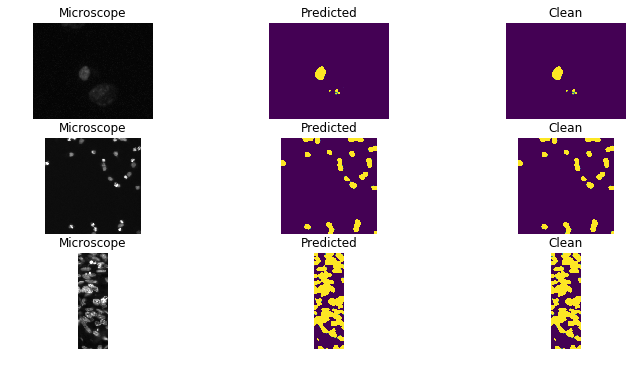

In [19]:
n_img = 3
from skimage.morphology import closing, opening, disk
def clean_img(x):
    return opening(closing(x, disk(1)), disk(3))

fig, m_axs = plt.subplots(3, n_img, figsize = (12, 6))
for (_, d_row), (c_im, c_lab, c_clean) in zip(test_img_df.sample(n_img).iterrows(), 
                                     m_axs):
    c_im.imshow(d_row['images'])
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(d_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Predicted')
    
    c_clean.imshow(clean_img(d_row['masks']))
    c_clean.axis('off')
    c_clean.set_title('Clean')





In [78]:
# json_model = simple_cnn.to_json()
# with open("nucleus_model.json", "w") as json_file:
#     json_file.write(json_model)
    
# simple_cnn.save_weights('nuclei_model_weights.h5')


